In [258]:
#""""
# Compare results from bmtk simulation and Ani's optimization by injecting step currents. 
# Yina Wei, created on Feb 14,2019
#""""
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import pickle
import os
import time
starttime = time.time()

def simpleaxis(ax):
    #Hide the right and top spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [259]:
# setup file directory
cellid=[313862167]
sweep_filenames ='LongDC_41' # 'DB_check_DC', 'LongDC_33', 'LongDC_34', 'LongDC_40', 'LongDC_41'
filedir = '/allen/programs/braintv/workgroups/v1column/yinaw/ateam_bmtk/'+str(cellid[0])+'_mouse_in_iclamp/'

In [260]:
# read Ani's optimization results
bpopt_model_response=pickle.load(open(filedir+'resp_opt.txt','r'))[0] # this is a dictionary with all the responses
specific_stim_response=bpopt_model_response[sweep_filenames+'.soma.v'] # pick out a stimulus for example here LongDC_33
specific_stim_response_time = specific_stim_response['time'] # time vector for the sim
specific_stim_response_voltage = specific_stim_response['voltage'] # voltage for the sim

In [261]:
# read bmtk simulation results
os.getcwd()
os.chdir(filedir+sweep_filenames+'/output')

#"""
#Read Data from hdf file format
#"""
# Read H5 files
f = h5py.File('cell_vars.h5','r')

# Extract values from H5 files
v=f['v/data']
[T,M]=v.shape        
print('T='+str(T))
print('M='+str(M))
# Print the attributes:
print("Data dimensions of v: ", v.shape)

# sample rate
fs=30000#10000
dt=0.033333#0.1#1/fs
t=pl.frange(0,T*dt-dt,dt)
ts=t/1000
#print(t.shape)

T=98101
M=1
('Data dimensions of v: ', (98101, 1))


In [262]:
# read current clamp protocol
with open(filedir+sweep_filenames+'/config.json') as data_file:    
    data = json.load(data_file)
    
json_data = data["inputs"]

amp = json_data["current_clamp_1"]["amp"]
delay = json_data["current_clamp_1"]["delay"]
duration = json_data["current_clamp_1"]["duration"]

# iclamp  input based on the information of amp, delay, and duration
i = np.zeros(v.shape)
indx = range(int(delay/dt),int((delay+duration)/dt))
i[indx] = amp

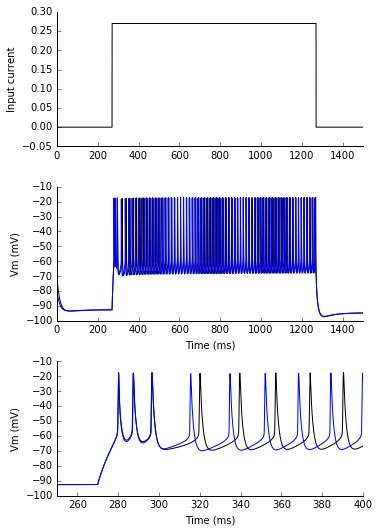

In [263]:
# plot with various axes scales
fig, ax = plt.subplots(figsize=(5,8))

# Plot lgn input
ax=plt.subplot(311)
plt.plot(t,i,color='k')
plt.ylabel('Input current')
simpleaxis(ax)
plt.xlim([0,1500])
plt.ylim(-0.05,0.3)

# Plot membrane potential
ax=plt.subplot(312)
plt.plot(t,v,color='k')
plt.plot(specific_stim_response_time,specific_stim_response_voltage,'b')
plt.ylabel('Vm (mV)')
simpleaxis(ax)
plt.xlabel('Time (ms)')
plt.xlim([0,1500])
#plt.ylim([-100,-10])

ax=plt.subplot(313)
plt.plot(t,v,color='k')
plt.plot(specific_stim_response_time,specific_stim_response_voltage,'b')
plt.ylabel('Vm (mV)')
simpleaxis(ax)
plt.xlabel('Time (ms)')
plt.xlim([250,400])
#plt.ylim([-100,-10])


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3,
           wspace=0.3)
fig.savefig(str(cellid[0])+sweep_filenames+'.png',bbox_inches = 'tight')
fig.savefig(str(cellid[0])+sweep_filenames+'.eps',bbox_inches = 'tight')
